In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
df= pd.read_csv('Customer_data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Step 1: Dataset Inspection

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Summary statistics
summary_stats = df.describe()

# Output the inspection results
missing_values, duplicates, summary_stats

(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
 0,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000)

# Step 2: Data Preprocessing

In [ ]:
# Selecting relevant numerical features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Show the first 5 scaled records to verify
np.round(scaled_features[:5], 2)


array([[-1.42, -1.74, -0.43],
       [-1.28, -1.74,  1.2 ],
       [-1.35, -1.7 , -1.72],
       [-1.14, -1.7 ,  1.04],
       [-0.56, -1.66, -0.4 ]])

 Step 3: Determine the optimal number of clusters using the Elbow Method

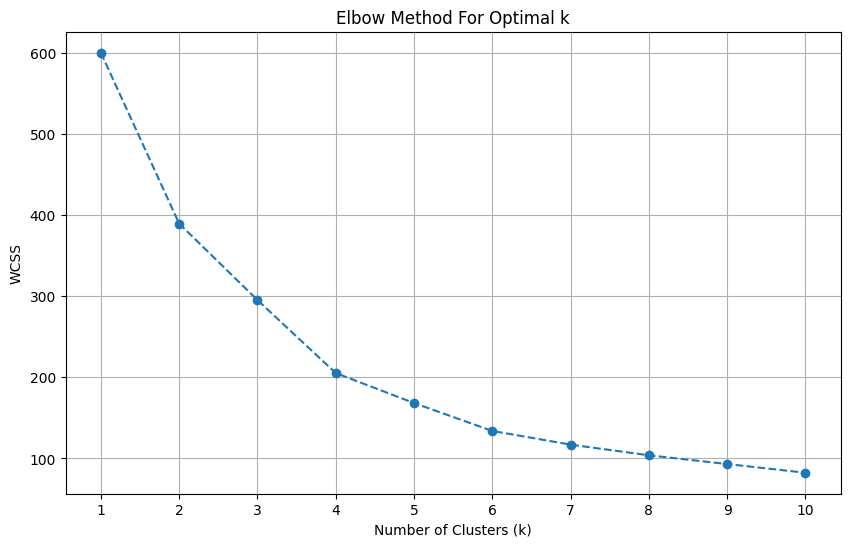

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


Step 4: Apply K-Means Clustering with optimal clusters

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Show the first few rows with the new cluster column
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


#Step 5: Visualization


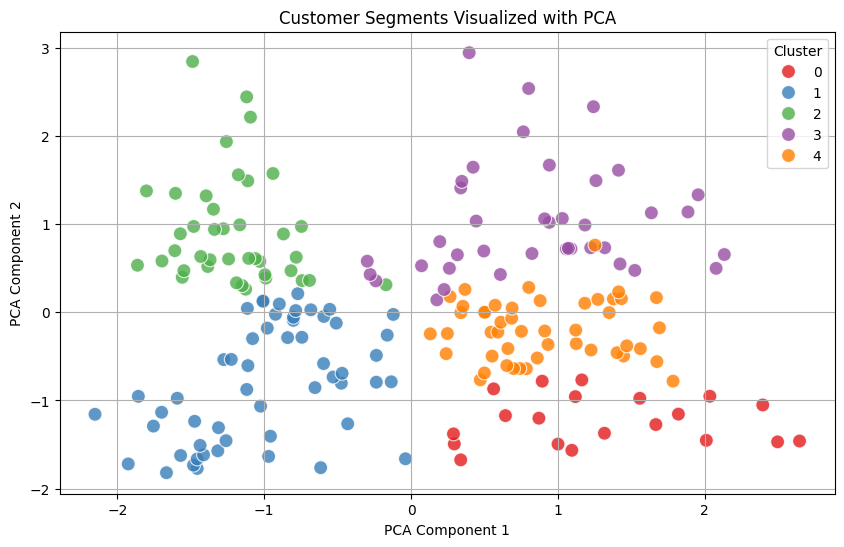

In [ ]:
# Reduce dimensions with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100,
    alpha=0.8
)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


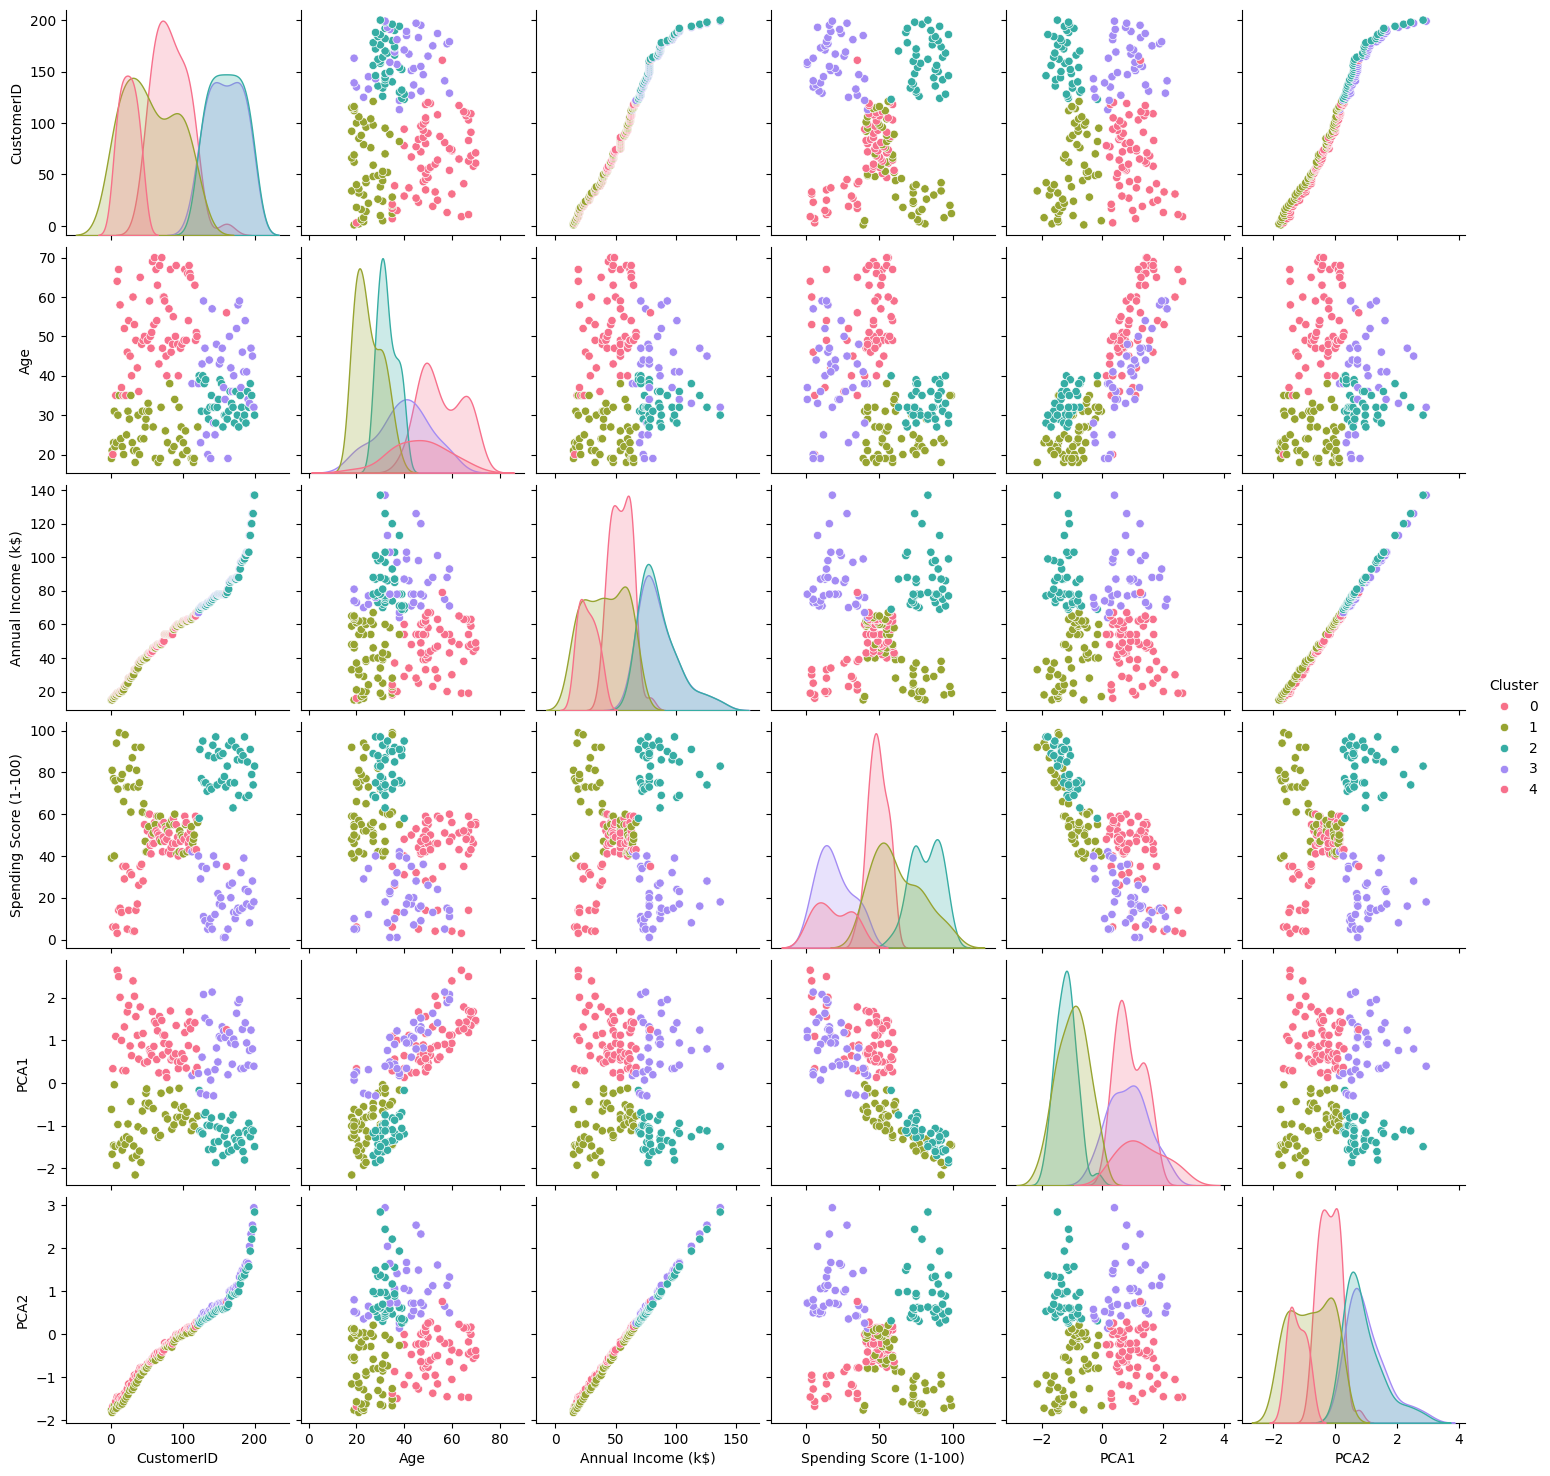

In [ ]:
# Generate the pair plot with numeric data, using the original df with the 'Cluster' column
pairplot_fig = sns.pairplot(df, hue='Cluster', palette='husl', diag_kind='kde')
plt.show()


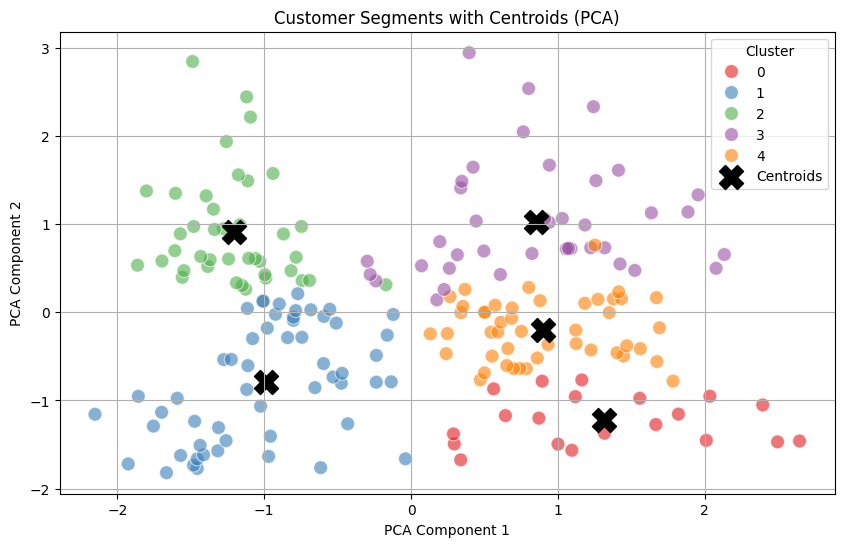

In [ ]:
centroids_scaled = kmeans.cluster_centers_

# Transform centroids to PCA space
centroids_pca = pca.transform(centroids_scaled)

# Plotting clusters with centroids
plt.figure(figsize=(10, 6))
# Scatter plot of customer clusters
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100,
    alpha=0.6
)

# Plot centroids
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    s=300, c='black', marker='X', label='Centroids'
)

plt.title('Customer Segments with Centroids (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


#3. Recommendations

🔍 Insights and Actions Based on Clusters:

✅ Which Groups to Target for Promotions or Premium Products:

Cluster 1: High-income, high-spending young adults → Premium products, VIP memberships.

Cluster 2: Young, moderate spenders → Seasonal promotions and discounts.

✅ Identify High-Spending Customers and Propose Loyalty Programs:

Cluster 1 is the top group for loyalty programs with cashback, events, and bonuses.